In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# ents = [0.0, 0.01, 0.05, 0.1, 0.4, 0.8]
ents = [0.0, 0.01, 0.1, 0.4, 0.8]
clips = [0.005, 0.02, 0.08, 0.2, 0.5, 0.8, 1e6]

In [3]:
def plot_returns(env_name, ents, clips, std_scale=0.1, y_max=None, tick=10):
    with open(f"{env_name}.npy", 'rb') as f:
        returns = np.load(f)
    with open(f"{env_name}_exps.npy", 'rb') as f:
        exps = np.load(f)
    assert len(returns.shape) == 4  # (n_seeds, n_ent, n_clip, n_exp)
    assert returns.shape[1:3] == (len(ents), len(clips))
    print("Shape:", returns.shape)
    print("Max:", np.max(np.mean(returns, axis=0)))

    plt.figure(figsize=(25, 17))

    for j in range(returns.shape[1]):

        data_j = pd.concat([pd.DataFrame(returns[:, j, k, :], index=[f"clip={clips[k] if clips[k]<1000 else None}"]*returns.shape[0], columns=exps)
                            for k in range(returns.shape[2])], axis=0)

        # plt.figure(figsize=(10, 7))
        assert returns.shape[1] <= 6
        plt.subplot(2, 3, j+1)
        ax = sns.lineplot(data_j.T, errorbar=("sd", std_scale))
        plt.xlabel("Experience")
        plt.ylabel("Return")
        plt.ylim(top=y_max)
        ax.yaxis.set_major_locator(plticker.MultipleLocator(base=tick))
        plt.title(f"Ent. bonus={ents[j]}")
        # plt.show()
    
    
    return returns

## 1. Acrobot

Shape: (8, 5, 7, 26)
Max: -76.6953125


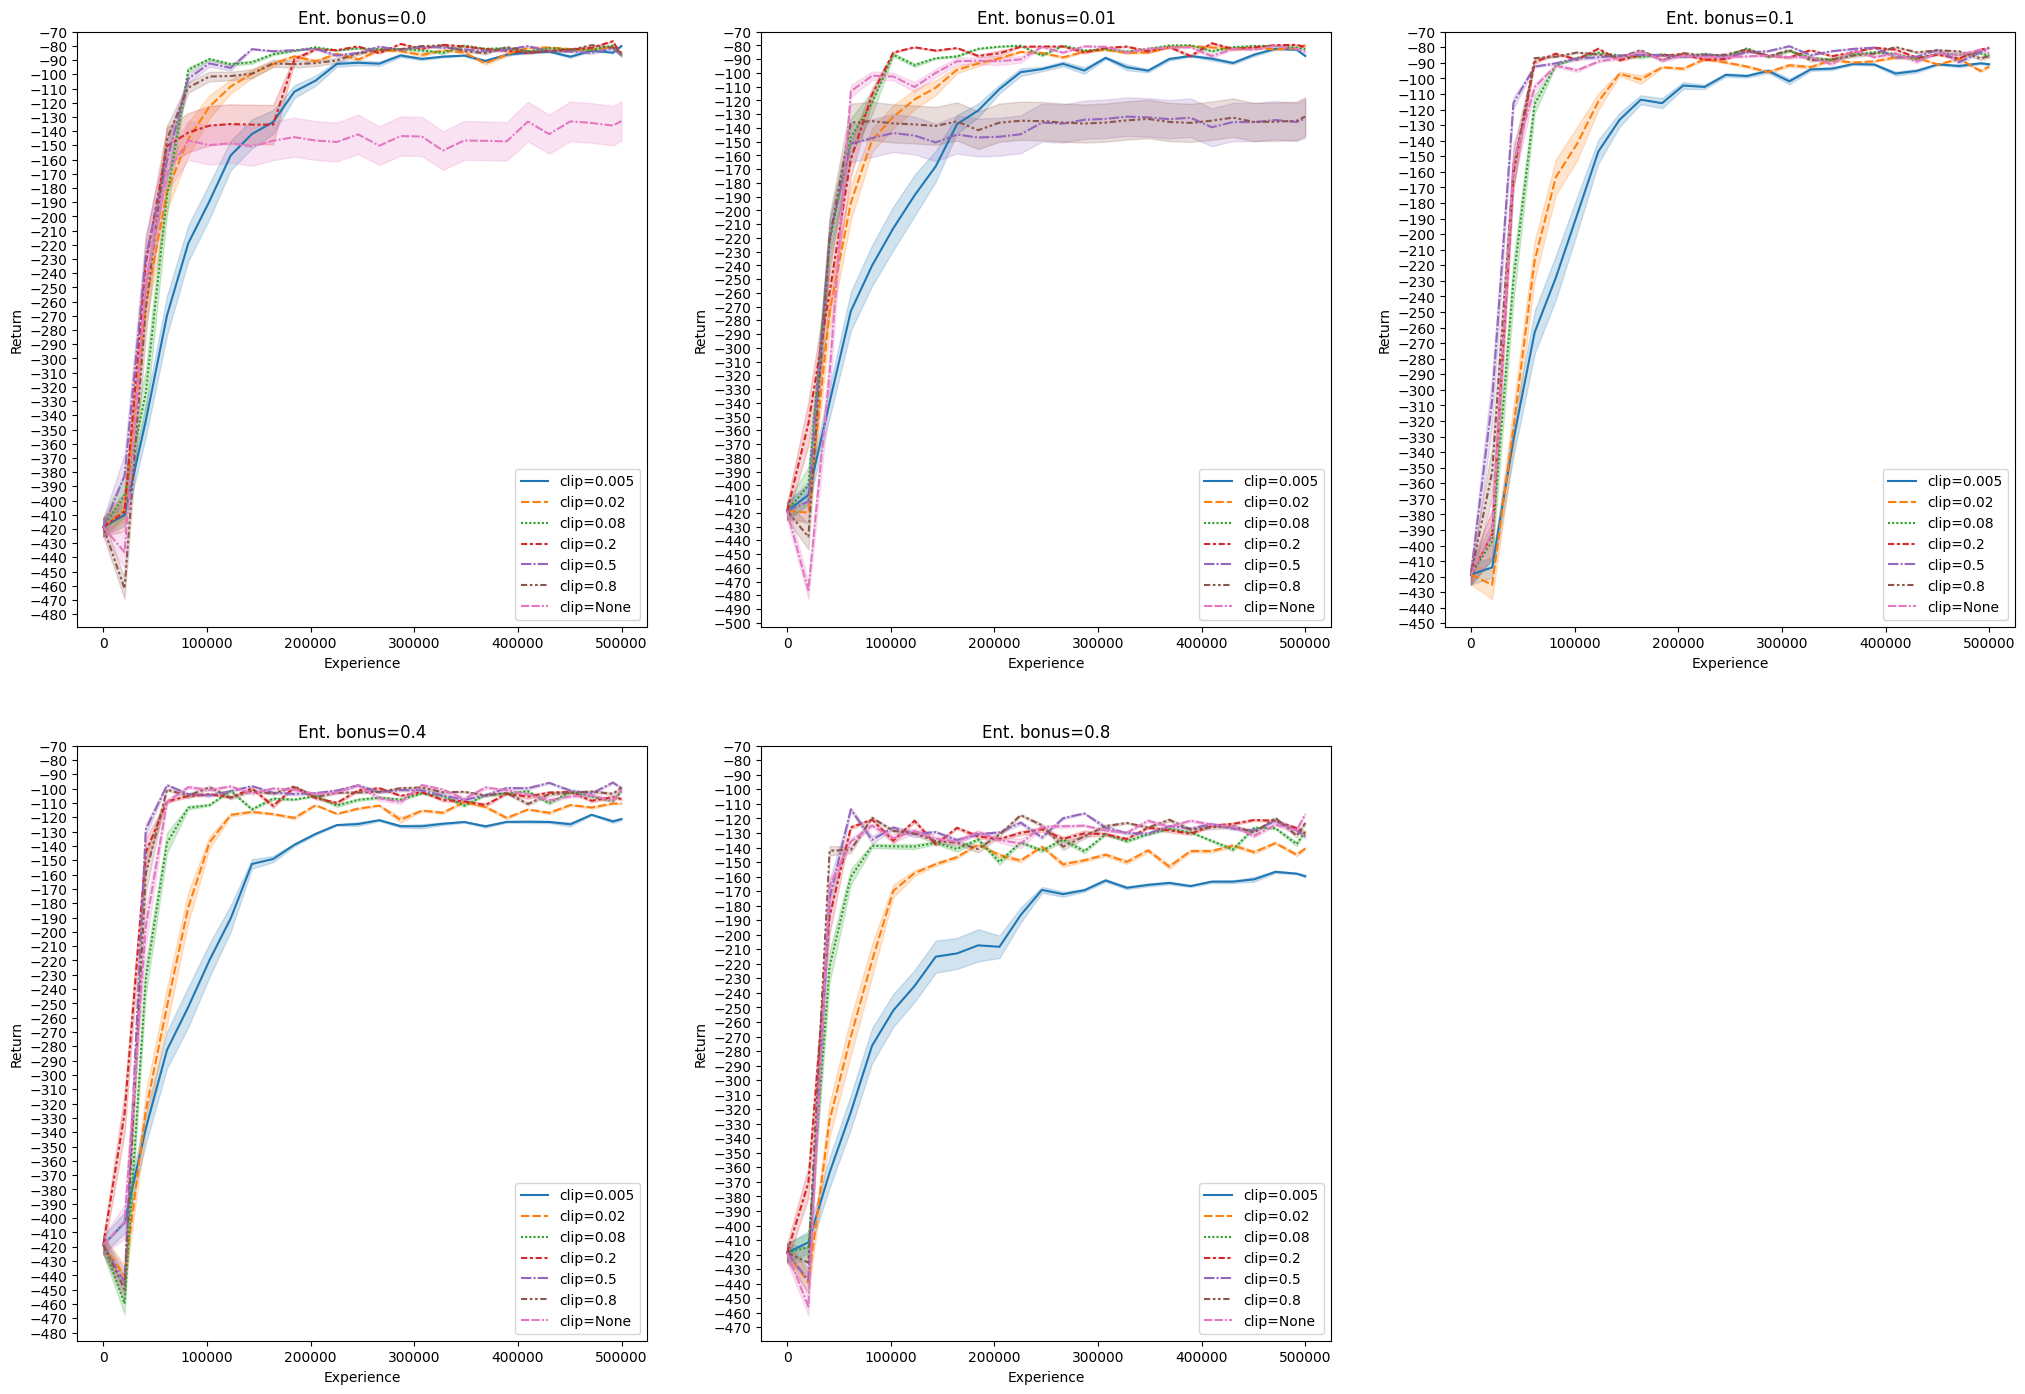

In [4]:
returns = plot_returns("Acrobot-v1", ents, clips, y_max=-70)

## 2. Asterix

Shape: (8, 5, 7, 32)
Max: 30.351562


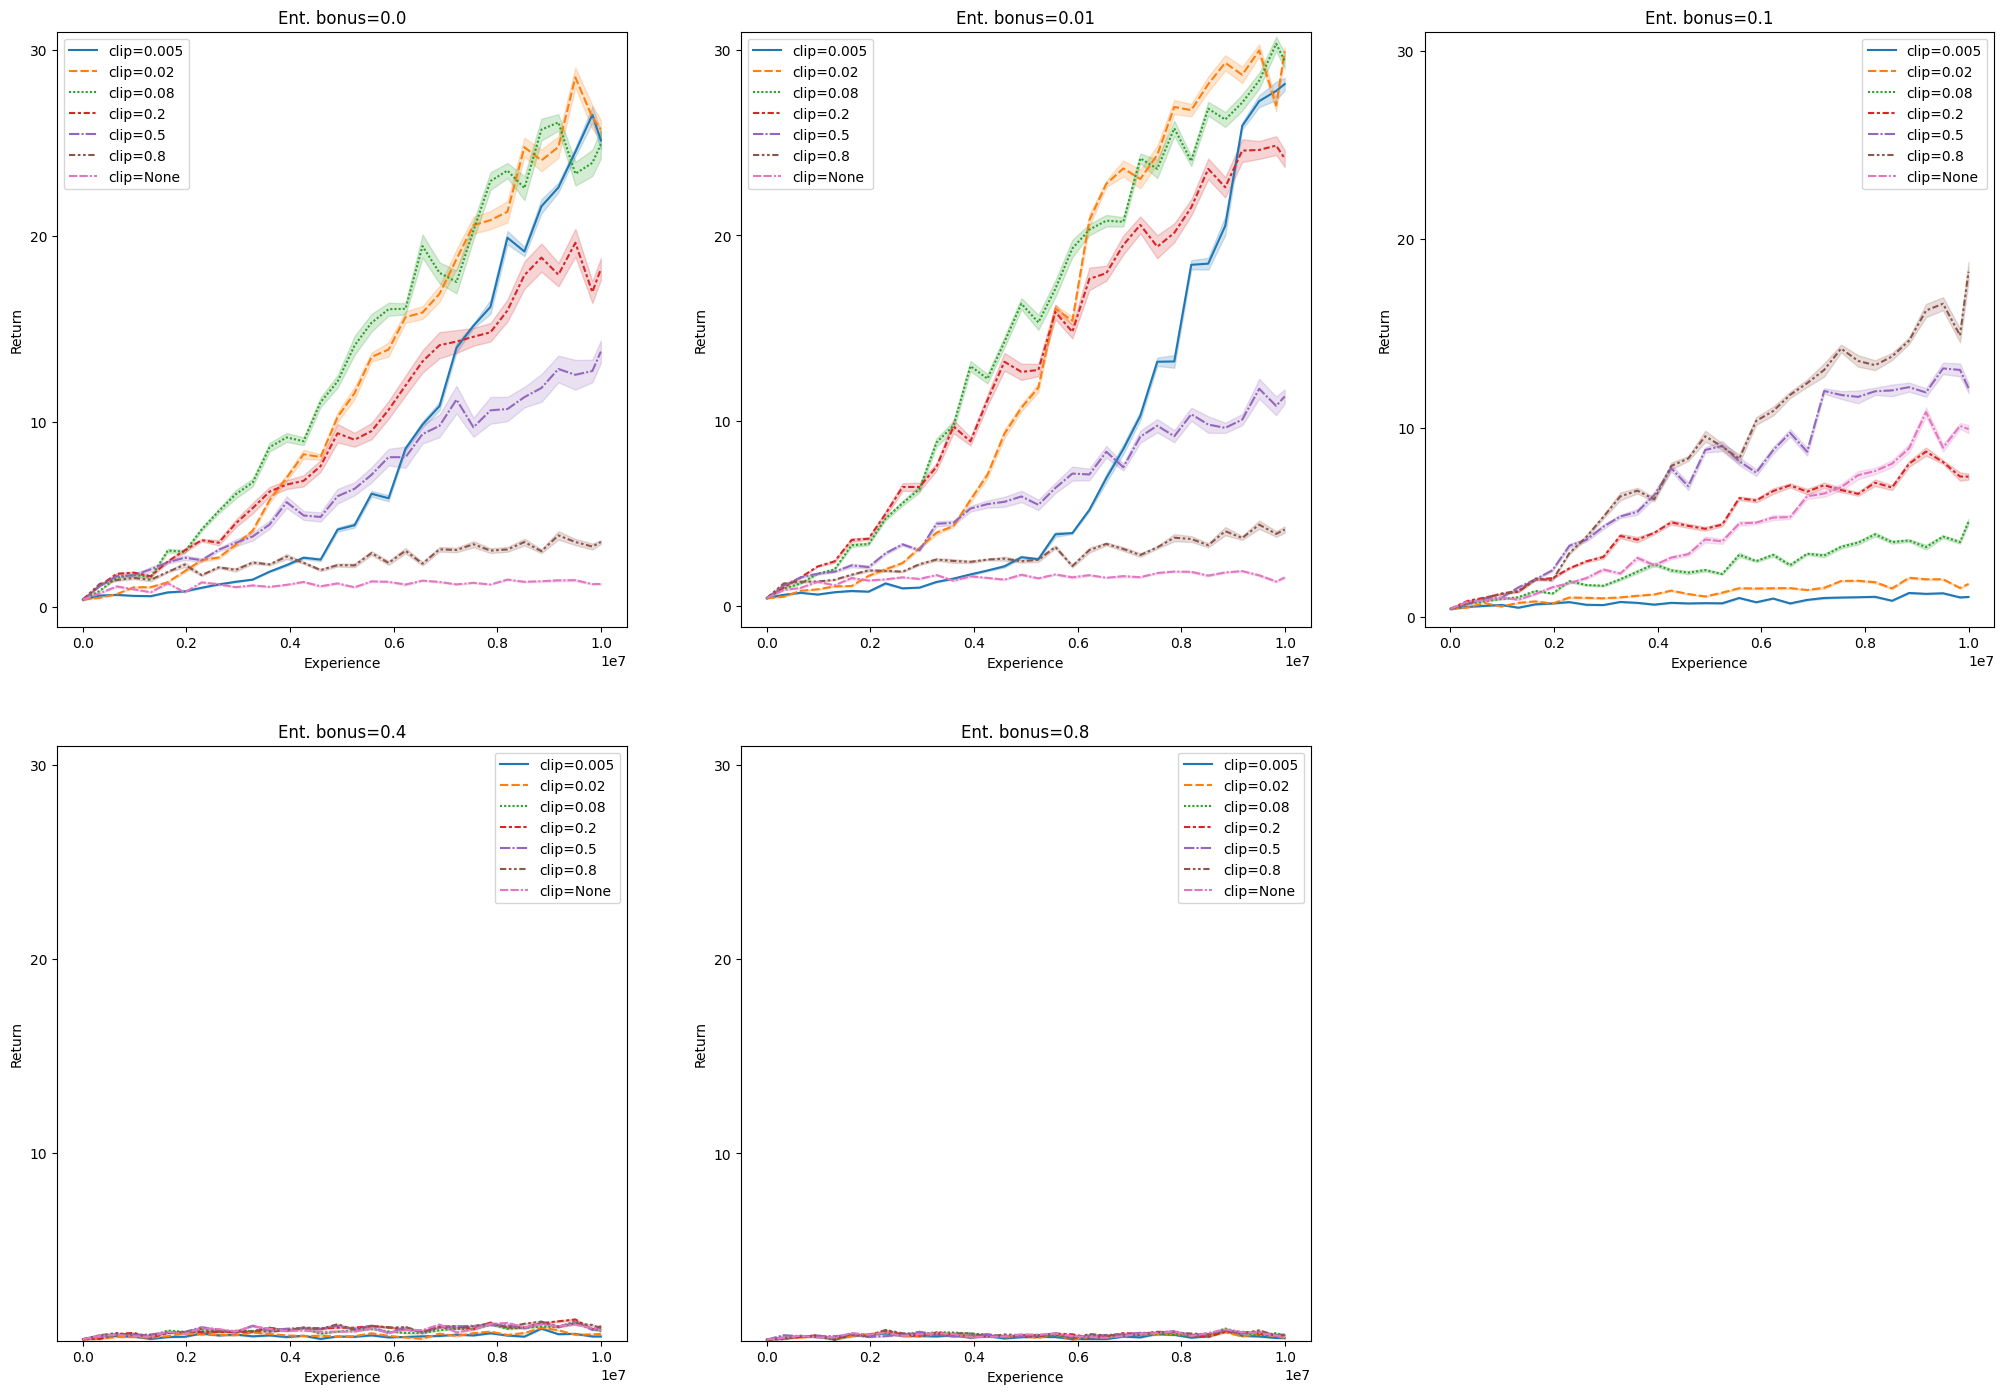

In [5]:
returns = plot_returns("Asterix-MinAtar", ents, clips, y_max=31)

## 3. Breakout

Shape: (8, 5, 7, 32)
Max: 65.30469


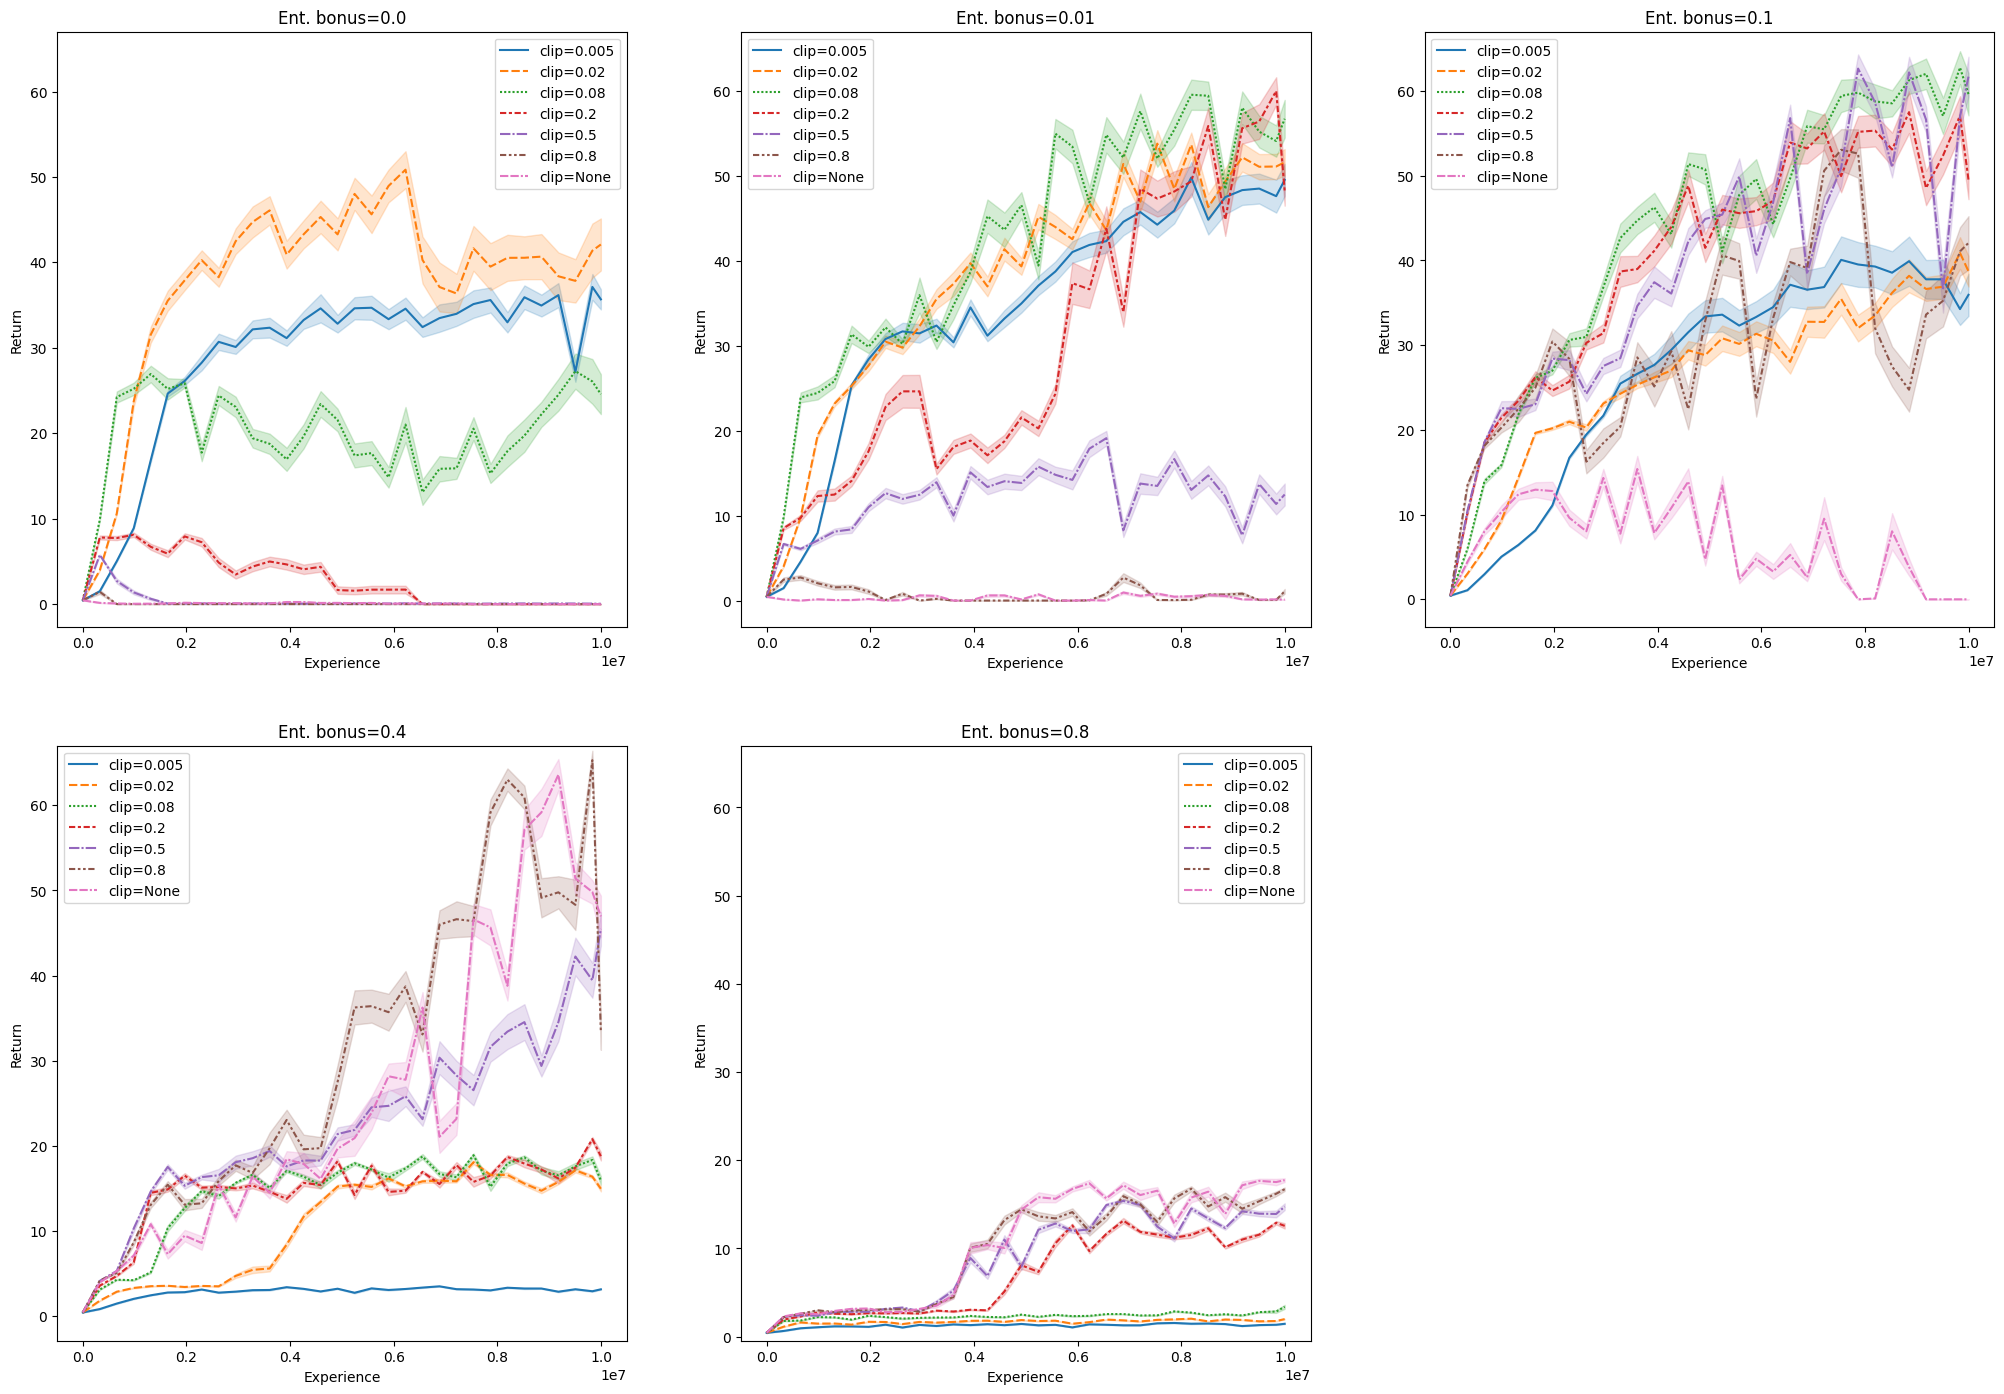

In [6]:
returns = plot_returns("Breakout-MinAtar", ents, clips, y_max=67)

## 4. CartPole

Shape: (8, 5, 7, 16)
Max: 500.0


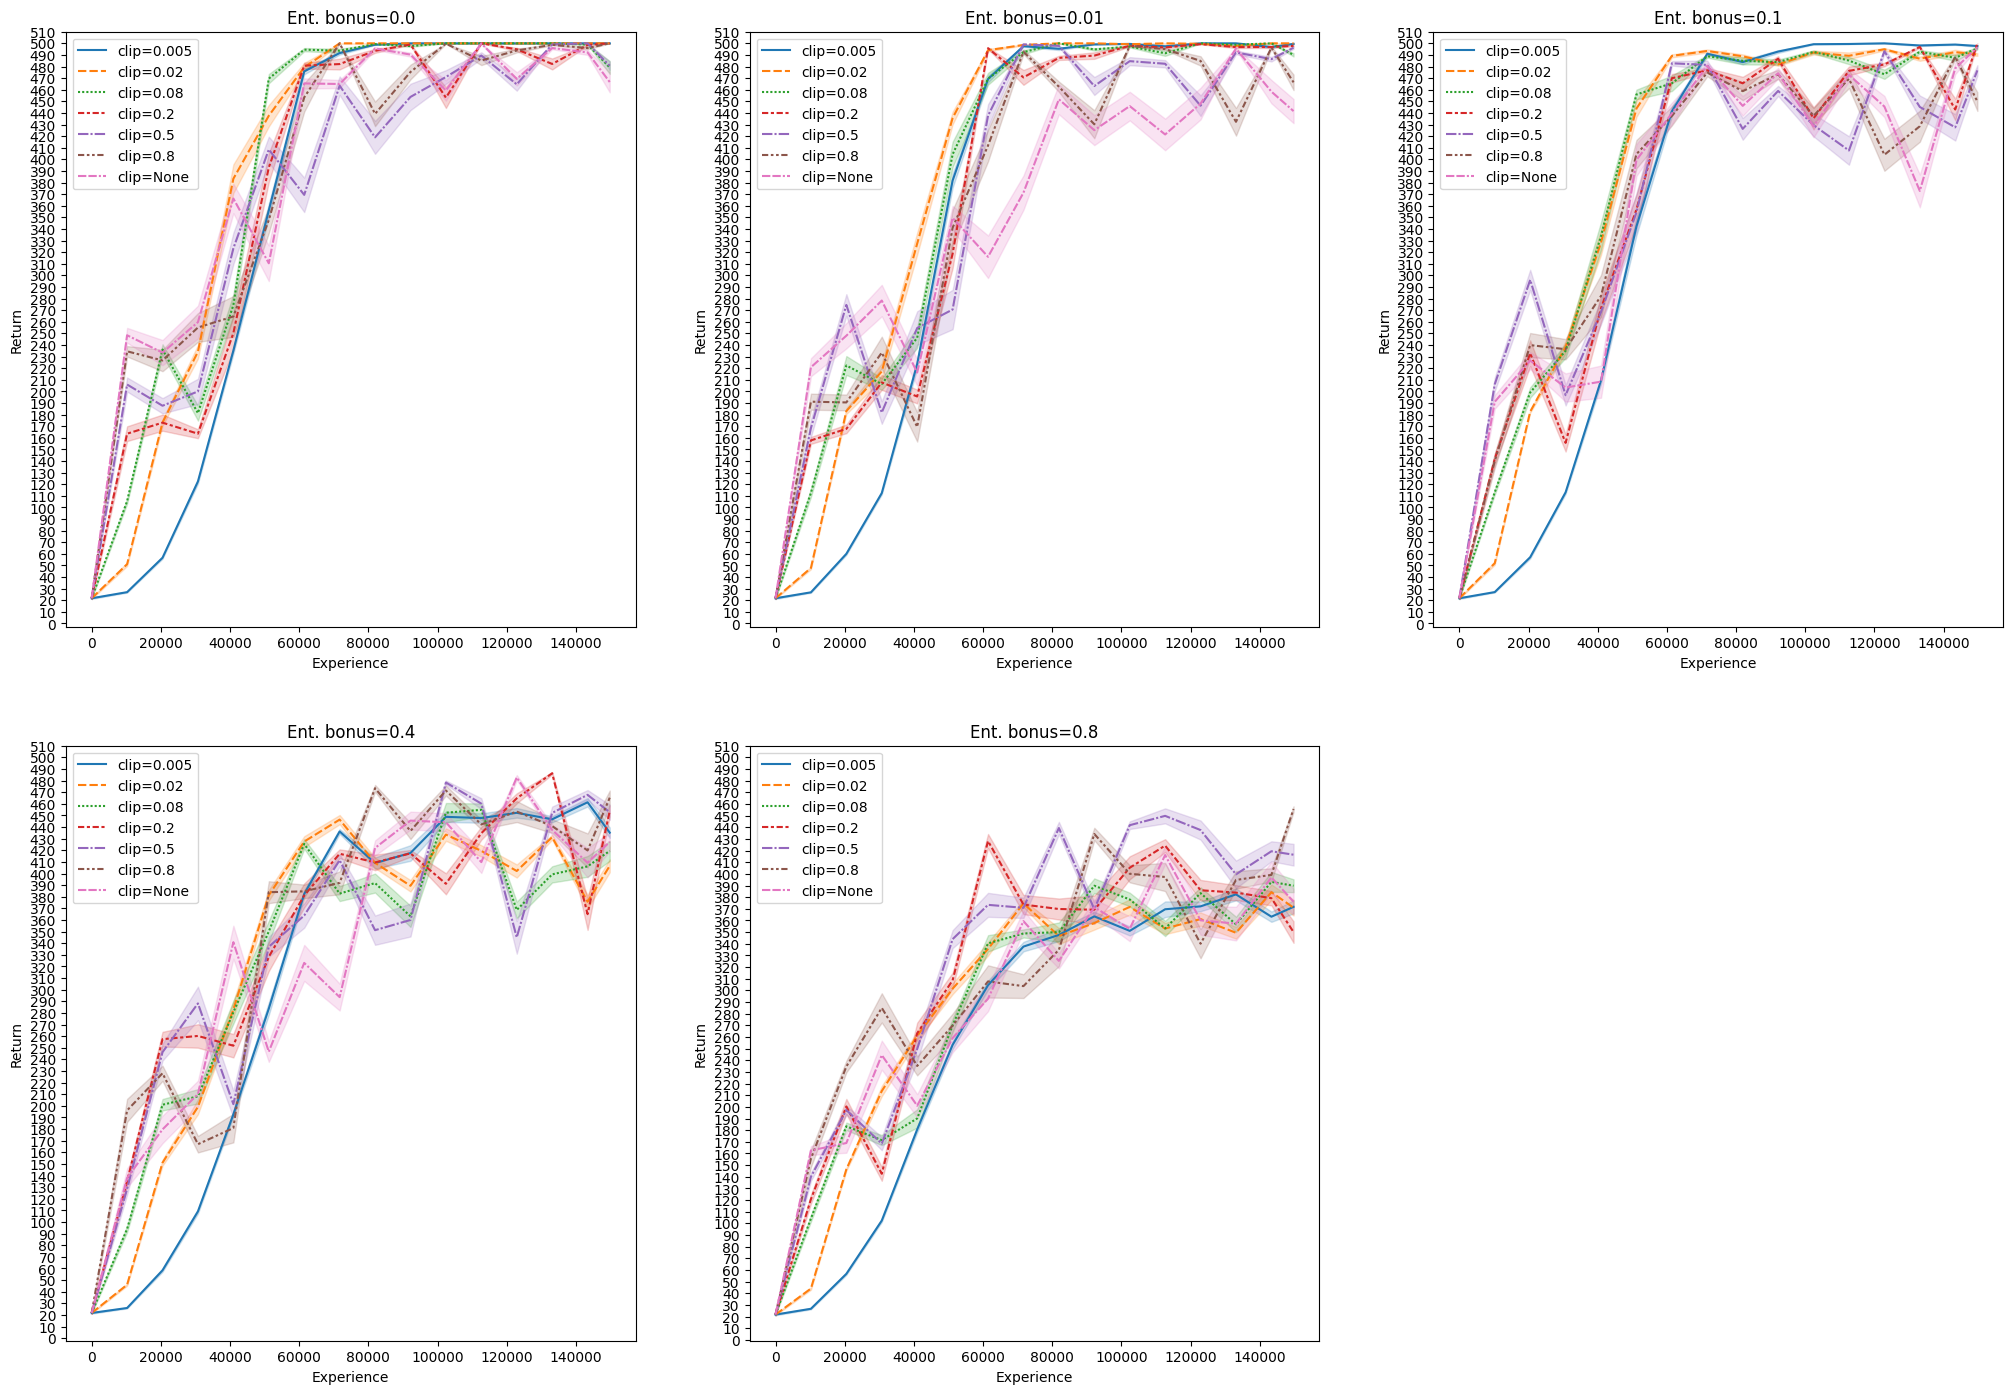

In [7]:
returns = plot_returns("CartPole-v1", ents, clips, y_max=510)

## 5. Freeway

Shape: (8, 5, 7, 32)
Max: 57.96875


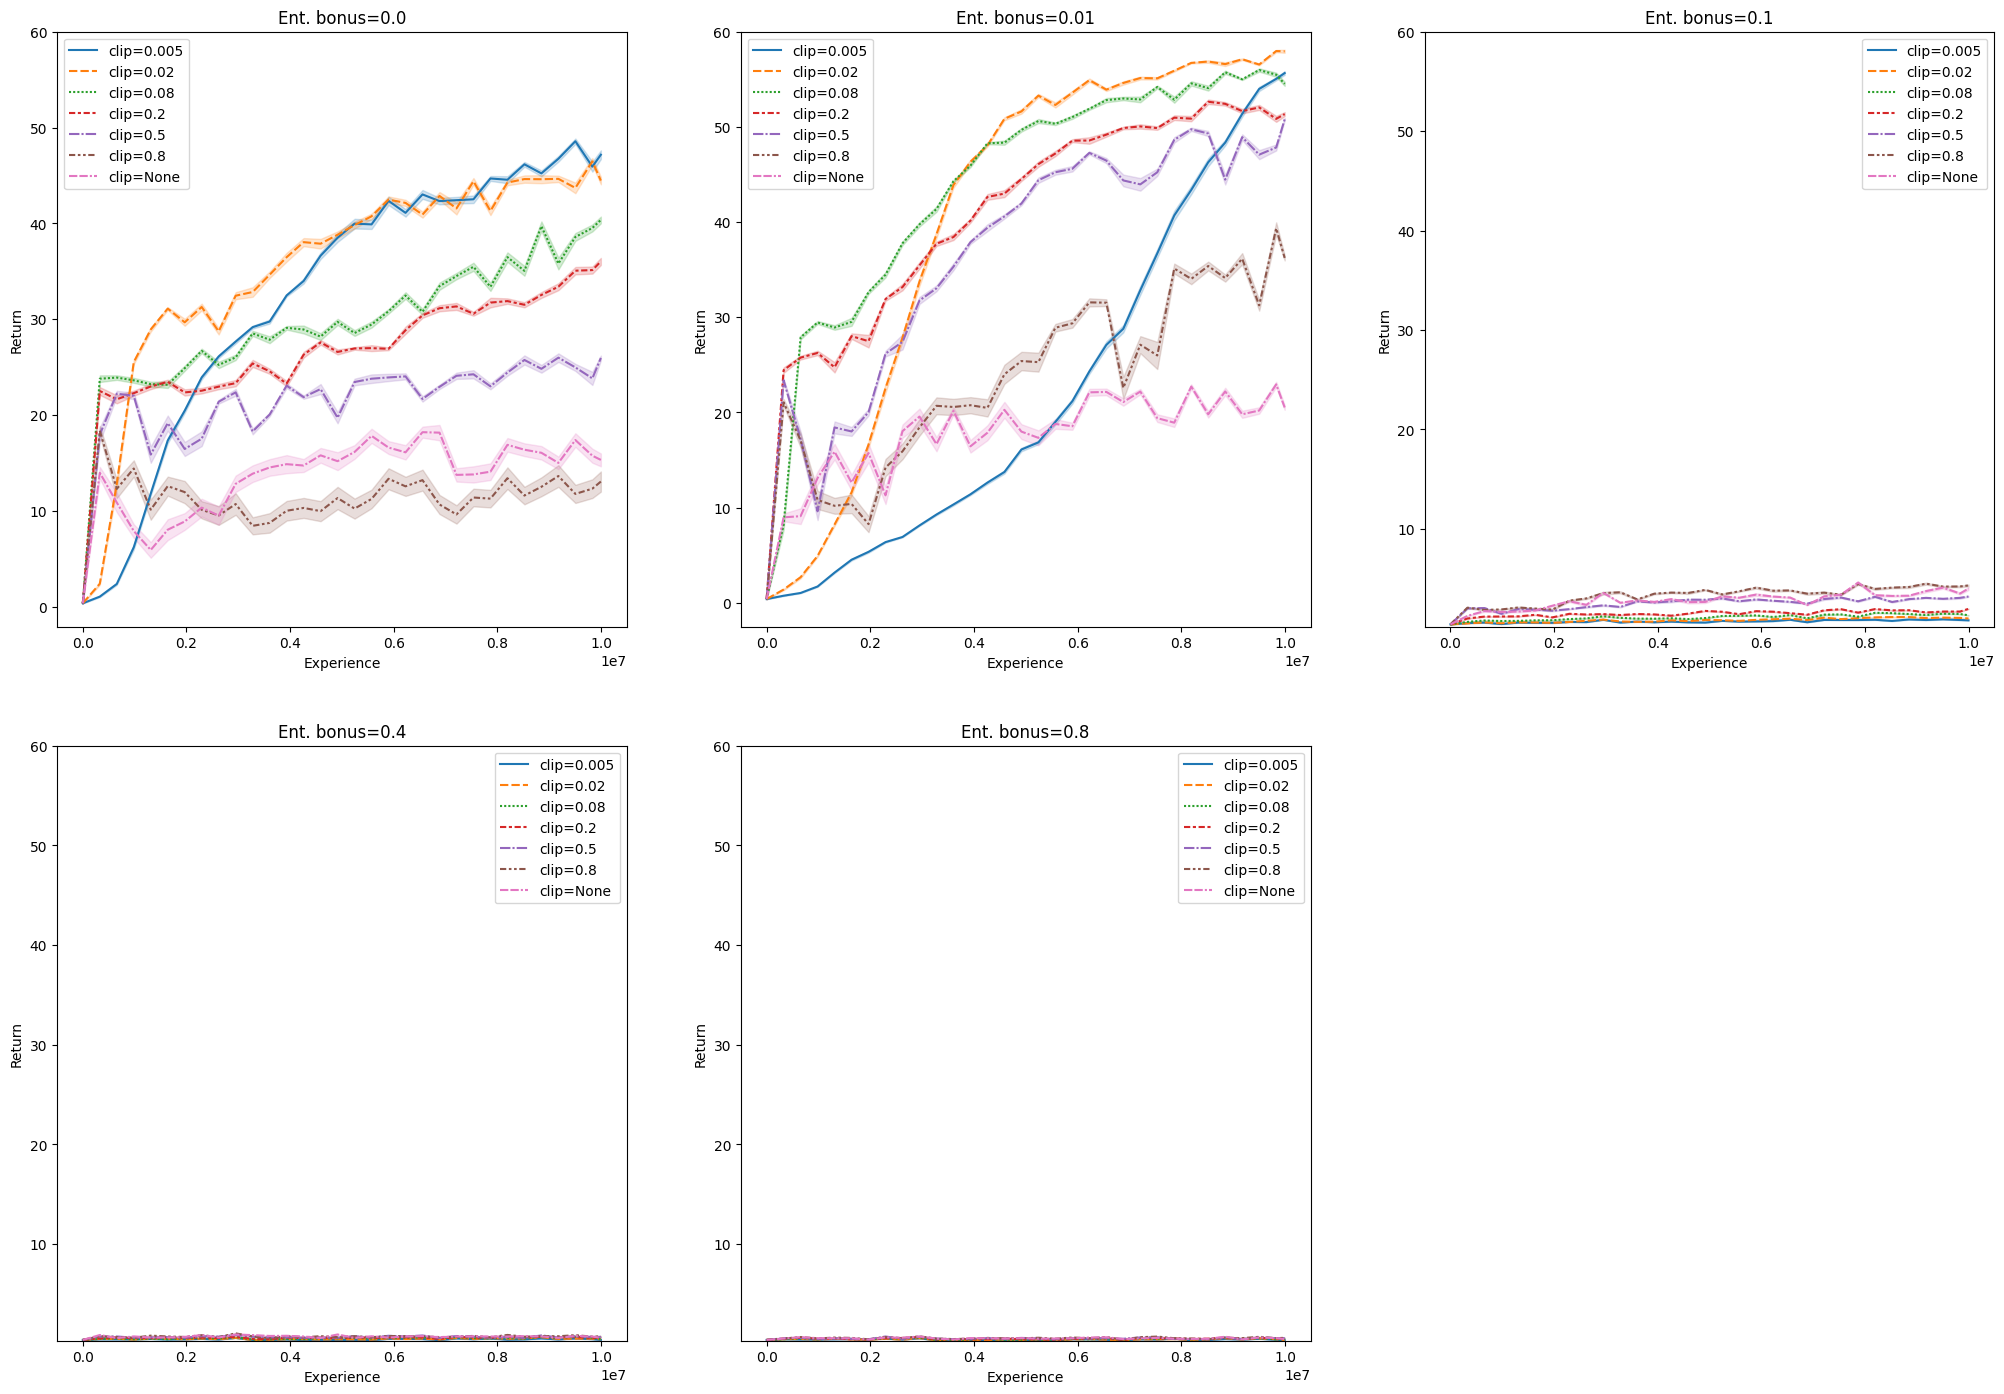

In [8]:
returns = plot_returns("Freeway-MinAtar", ents, clips, y_max=60)

## 6. MountainCar

Shape: (8, 5, 7, 14)
Max: -103.984375


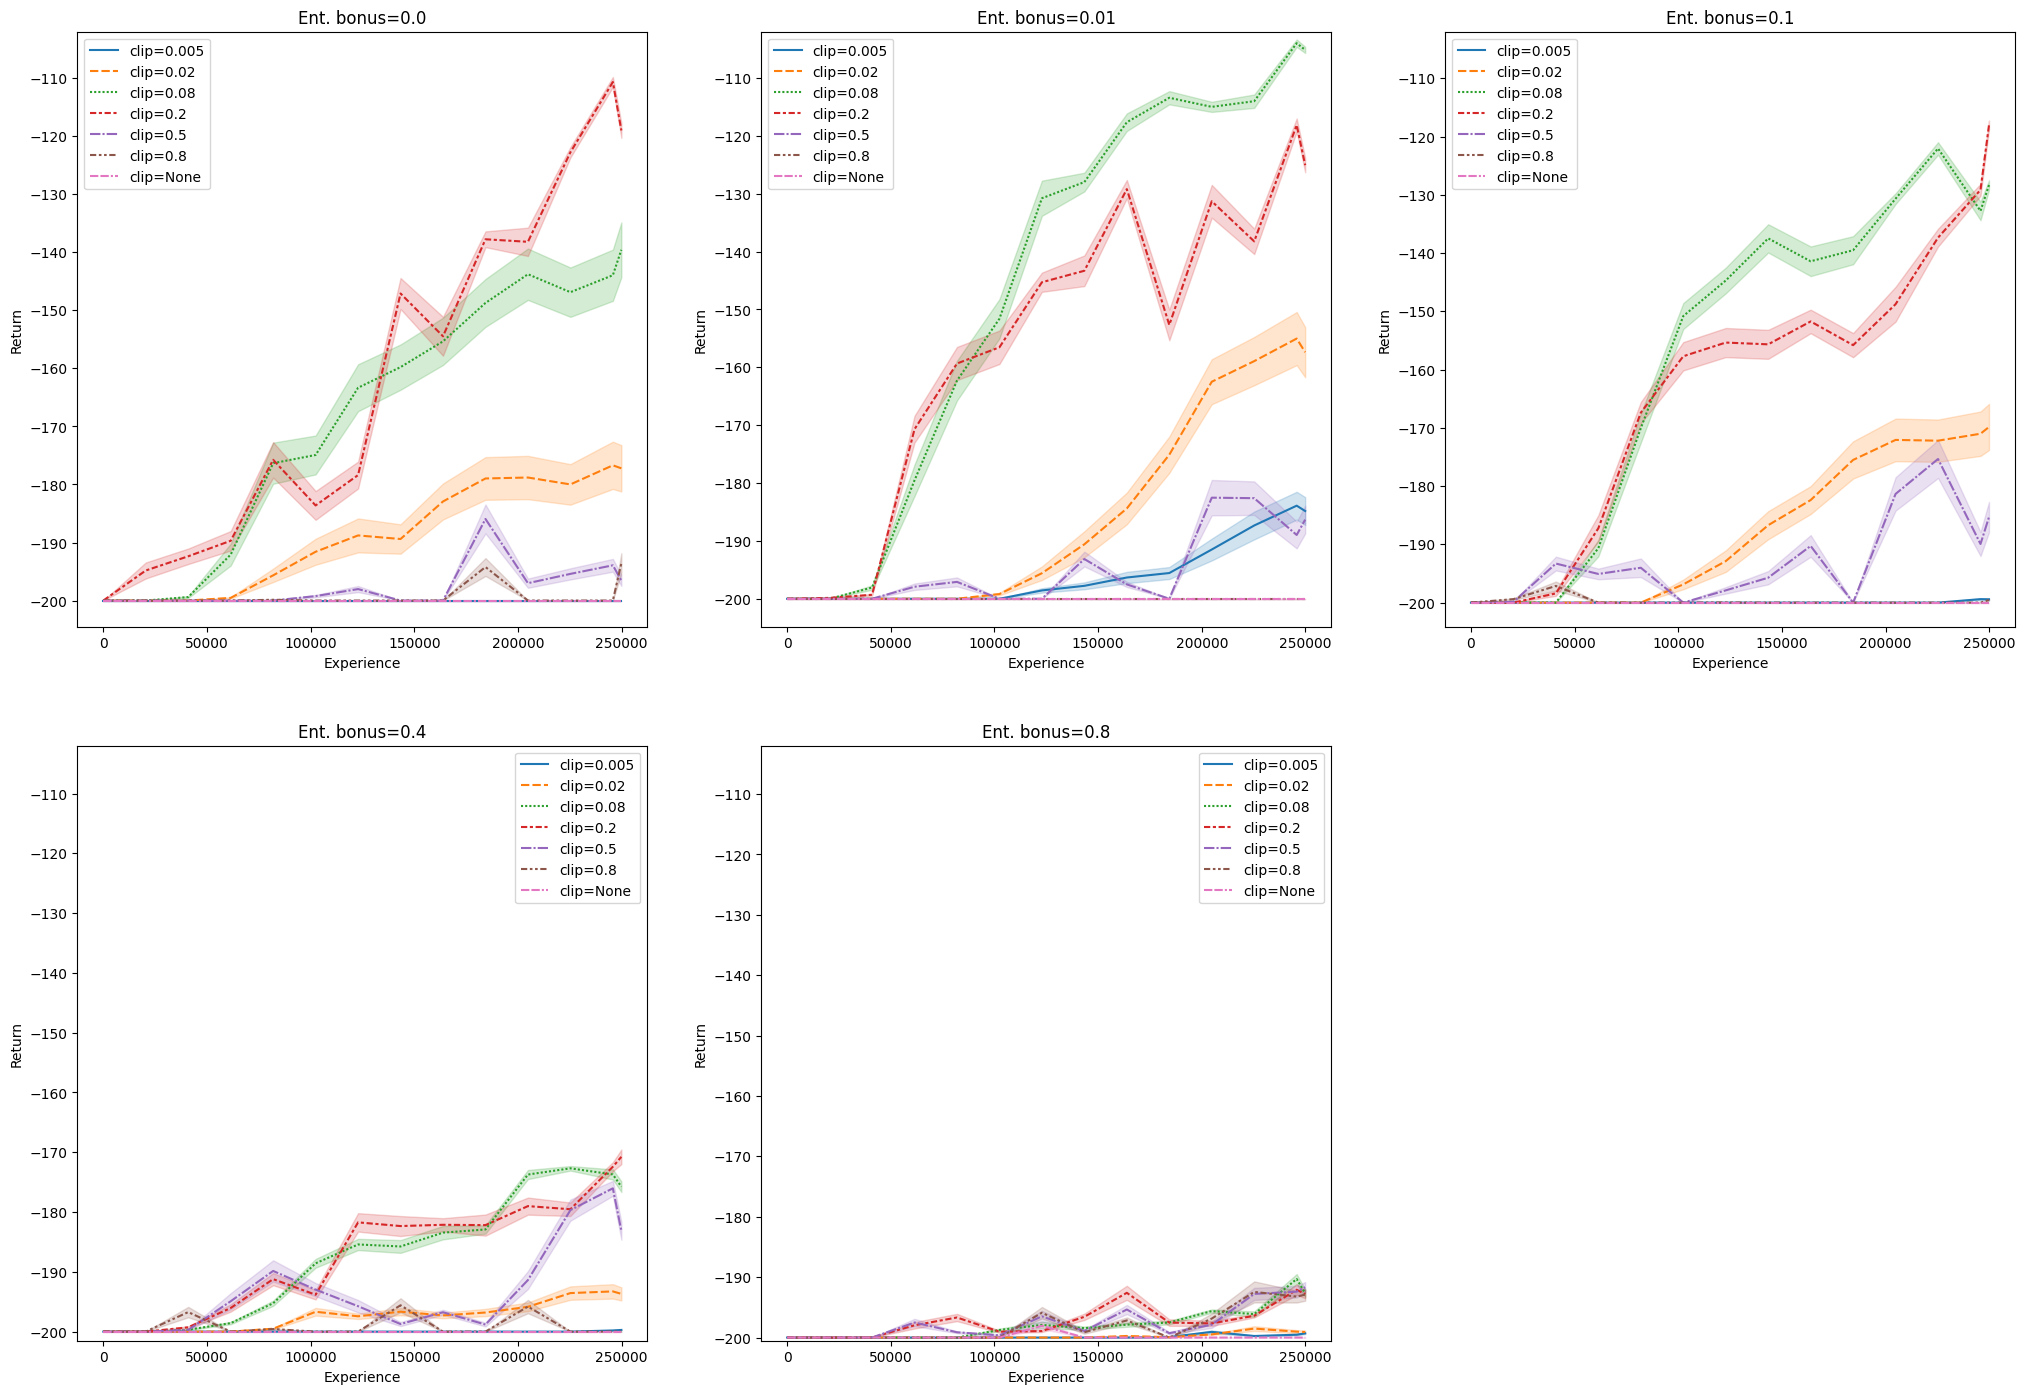

In [9]:
returns = plot_returns("MountainCar-v0", ents, clips, y_max=-102)

## 7. SpaceInvaders

Shape: (8, 5, 7, 32)
Max: 164.32812


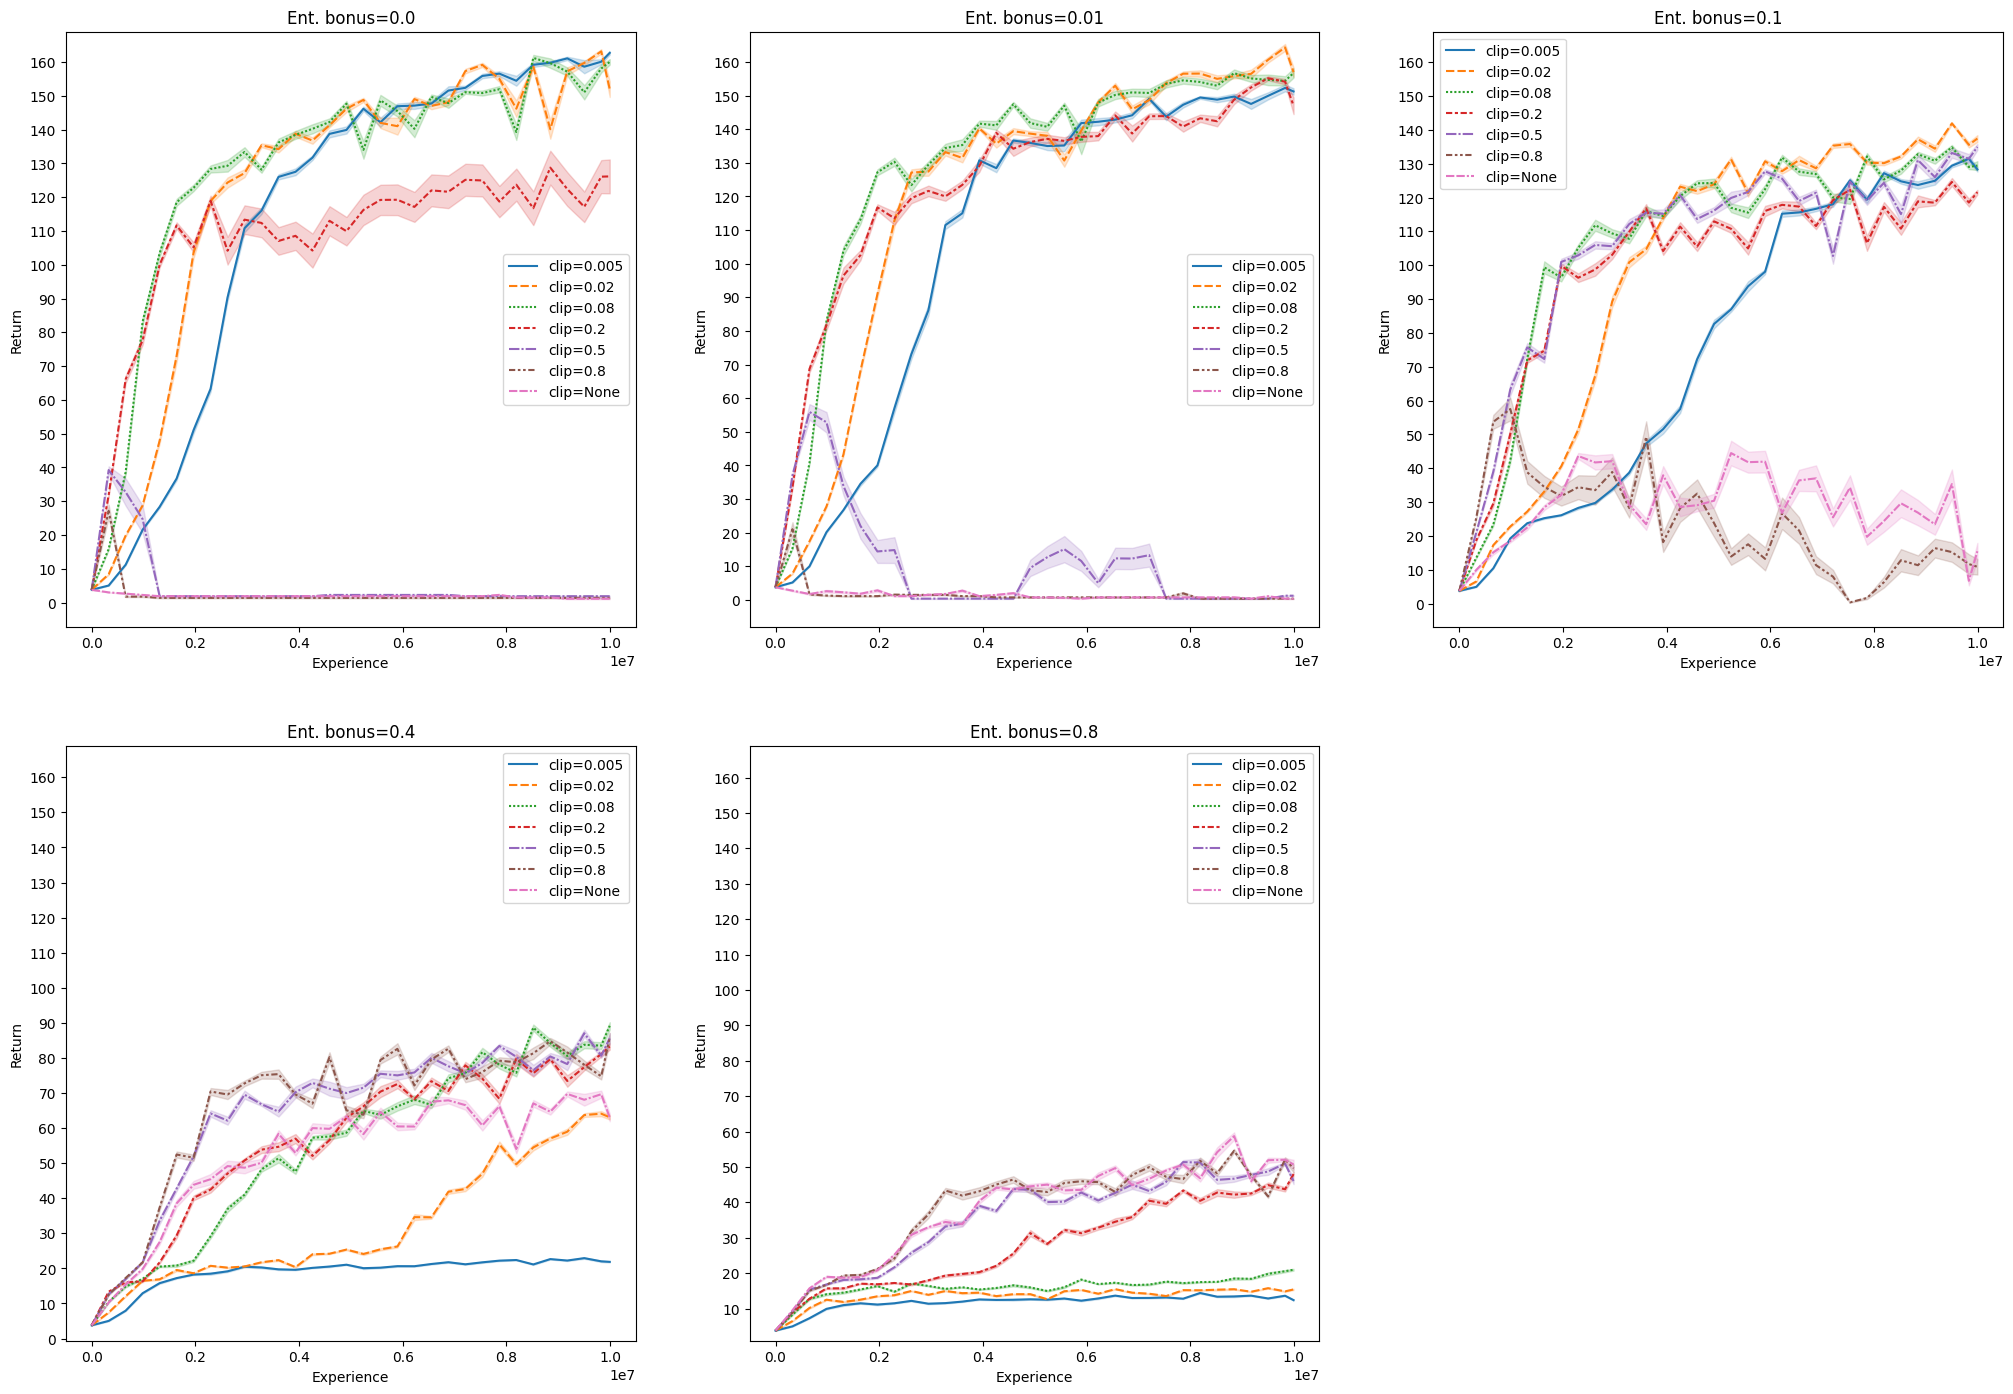

In [10]:
returns = plot_returns("SpaceInvaders-MinAtar", ents, clips, y_max=169)